# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

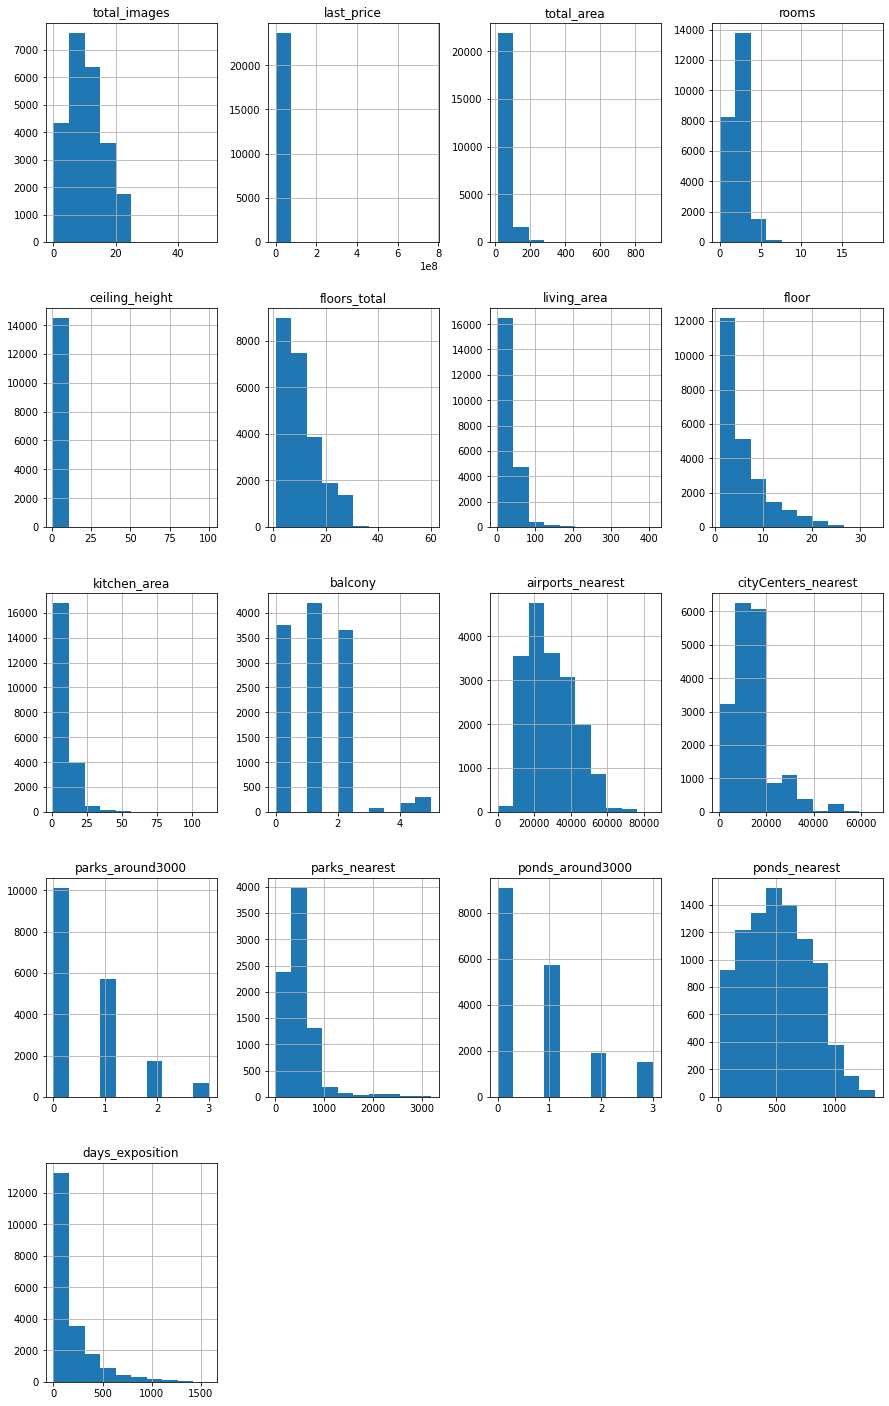

In [3]:
data.hist(figsize=(15, 25));

Таким образом, мы получили основную информацию о датасете.

### Предобработка данных

In [4]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Данные, которые можем подкорректировать:**

* is_apartment - апартаменты (булев тип) (скорее всего это не аппартаменты и можно присвоить пропускам значение False)
* balcony - число балконов (скорее всего там нет балконов и можно присвоить пропускам значение 0)
* ponds_around3000 - число водоёмов в радиусе 3 км (скорее всего рядом нет водоемов и можно присвоить пропускам значение 0)
* parks_around3000 - число парков в радиусе 3 км (скорее всего рядом нет парков и можно присвоить пропускам значение 0)


**Данные, в которых лучше оставить значение Null, так как эти данные скорее всего просто забыли ввести:**

* locality_name - название населённого пункта
* ceiling_height - высота потолков (м)
* floors_total - всего этажей в доме
* living_area - жилая площадь в квадратных метрах (м²)
* kitchen_area - площадь кухни в квадратных метрах (м²)
* airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
* city_centers_nearest -  расстояние до центра города (м)
* parks_nearest - расстояние до ближайшего парка (м)
* ponds_nearest - расстояние до ближайшего водоёма (м)
* days_exposition - сколько дней было размещено объявление (от публикации до снятия)

In [6]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Допустим, что высота потолка зависит от месторасположения квартиры относительно центра города.

Поделим по категориям

0-3000 - самый центр
3000-6000 - центральная часть
6000-17000 - большая часть города
больше 17000 - пригород

In [8]:
def categ_ceiling_height(center):
    try:
        if 0 <= center <= 3000:
            return 'самый центр'
        elif 3001 <= center <= 6000:    
            return 'центральная часть'
        elif 6001<= center <= 17000:    
            return 'большая часть города'
        elif center >= 17000:    
            return 'пригород'
        else:
            return 'не определено'
    except:
        pass
            

In [9]:
data['city_centers_category'] = data['city_centers_nearest'].apply(categ_ceiling_height)

Найдем медианное значение высоты потолка в зависимости от месторасположения квартиры

In [10]:
for center in data['city_centers_category'].unique():
    data.loc[(data['city_centers_category'] == center) & (data['ceiling_height'].isna()==True), 'ceiling_height'] =\
    data.loc[(data['city_centers_category'] == center), 'ceiling_height'].median()

In [11]:
data['ceiling_height'].isna().sum()

0

**Проверяем типы данных**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         23699 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            21796 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           23699 non-null  object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                23699 non-null  float64
 14  locality_name          23650 non-null  object 
 15  ai

**Столбцы, которых необходимо изменить тип данных:**

* last_price - int64
* first_day_exposition - date (для дальнейшего удобства работы с датой)
* floors_total - int8
* is_apartment - bool
* balcony - int8
* days_exposition - int64

В основном, изменение типа данных необходимо для экономии памяти. Только в случае с first_day_exposition это необходимо для дальнейшего удобство в работе с данными.

In [13]:
try:
    data['last_price'] = data['last_price'].astype('int64')
except:
    print('Ошибка при изменении типа last_price в int64')
    
try:    
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
except:
    print('Ошибка при изменении типа first_day_exposition в date')
    
try:
    data['floors_total'] =  data['floors_total'].astype('Int8')
except:
    print('Ошибка при изменении типа floors_total в int8')
      
try:
    data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})
except:
    print('Ошибка при изменении типа is_apartment в bool')
        
try:
    data['balcony'] = data['balcony'].astype('int8')
except:
    print('Ошибка при изменении типа balcony в int8')
    
try:
    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
except:
    print('Ошибка при изменении типа days_exposition в int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  int64         
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         23699 non-null  float64       
 6   floors_total           23613 non-null  Int8          
 7   living_area            21796 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           20924 non-null  object        
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           21421 non-null  float64       
 13  b

**Устранение неявных дубликатов**

Чтобы устранить неявные дубликаты выполним следущие действия: приведем все названия в нижний регистр, выполним замену "ё" на "е" и заменим "городской поселок" и "поселок городского типа" на "поселок". Затем проверим на наличие явных дубликатов. 

Для начала проверим количество уникальных значений в столбце locality_name

In [15]:
data['locality_name'].unique().shape[0]

365

Изменим регистр на нижний, выполним замену "ё" на "е", заменим "городской поселок" и "поселок городского типа" на "поселок"

In [16]:
data['locality_name'] = data['locality_name'].str.lower()

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

Проверим, насколько уменьшилось количество уникальных значений в столбце locality_name, то есть сколько неявных дубликатов нам удалось удалить

In [17]:
data['locality_name'].unique().shape[0]

323

**Устранение редких и выбивающихся значений**

Выведем распределение значений в данных

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.729795,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.991359,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.750000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Рассмотрим подорительные данные

**last_price**

Посчитаем количество квартир мельше 100 000 и больше 100 000 000

In [19]:
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 100000.0')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 100000000.0')['last_price'].count())

Квартир стоимостью меньше 100.000: 1
Квартир стоимостью больше 100.000.000: 37


Эти данные можно считать выбросами, так что следует их удалить

Удалем выбросы столбца last_price

In [20]:
data.drop(index=data.query('last_price < 100000.0').index,inplace=True)
data.drop(index=data.query('last_price > 100000000.0').index,inplace=True)

**total_area**

Посчитаем количество квартир с площадью менее 10 кв.м и более 500 кв.м.

In [21]:
print('Квартир площадью менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 500 кв.м.: 3


Квартиры со площадью более 500 кв.м. можно считать за аномалии, тк их совсем мало. Поэтому удаляем эти данные.

In [22]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

**rooms**

Проверим, сколько квартир без комнат. Возможно это студии, или апартаменты, или свободная планировка

In [23]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

print('Квартиры без комнат и студии, или апартаменты, или свободная планировка:',\
      data.query('rooms == 0 and studio')['rooms'].count()\
      +data.query('rooms == 0 and is_apartment')['rooms'].count()\
      +data.query('rooms == 0 and open_plan')['rooms'].count()) 

Квартиры без комнат: 197
Квартиры без комнат и студии, или апартаменты, или свободная планировка: 197


Таким образом, квартиры без комнат не являются выбросами. Однако значений больше 7 комнат достаточно мало, так что это можно считать за аномалии и эти данные стит удалить.

In [24]:
data.drop(index=data.query('rooms > 7').index,inplace=True)

**ceiling_height**

Проверим, сколько квартир с разным метражом

In [25]:
print('Квартир с потолками от 4 до 5м: ', data.query('ceiling_height > 4 and ceiling_height <= 5')\
      ['ceiling_height'].count())
print('Квартир с потолками от 5 до 25м: ', data.query('ceiling_height > 5 and ceiling_height < 25')\
                                                ['ceiling_height'].count())
print('Квартир с потолками от 25м до 36м: ', data.query('ceiling_height >= 25 and ceiling_height <= 36')\
                                                  ['ceiling_height'].count())
print('Квартир с потолками от 25м до 36м: ', data.query('ceiling_height > 36 and ceiling_height < 50')\
      ['ceiling_height'].count())
print('Квартир с потолками от 50м: ', data.query('ceiling_height >= 50')['ceiling_height'].count())

Квартир с потолками от 4 до 5м:  36
Квартир с потолками от 5 до 25м:  14
Квартир с потолками от 25м до 36м:  19
Квартир с потолками от 25м до 36м:  0
Квартир с потолками от 50м:  1


Не бывает квартир с потолками выше 4 метров или это считается аномалией. В данных квартир с потолками выше 25 метров и ниже 36 скорее всего была допущена ошибка, эти данные стоит отредактировать.А вот потолки от 5 до 25 метров и выше 50 метров можно считать аномалией и эти данные стоит удалить.

In [26]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

**floors_total**

Проверим количество квартир в доме с более 30 этажами

In [27]:
print('Квартир в домах с более 30 этажами: ',data.query('floors_total > 30')['floors_total'].count())

Квартир в домах с более 30 этажами:  32


Такие данные можно считать аномальными и их стоит удалить.

In [28]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)

**living_area**

Проверим, сколько квартир с разной жилой площадью

In [29]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше 200:  12


Квартиры с жилой площадью меньше 10кв.м. и более 200 кв.м. можно считать аномалиями. Значения стоит удалить.

In [30]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

**kitchen_area**

Проверим, сколько квартир с разной площадью кухни

In [31]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни больше 50 кв.м.:  33


Такие данные можно считать аномальными и их стоит удалить.

In [32]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

**days_exposition**

Проверим количество объявлений, которым больше 3 лет

In [33]:
print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

Объявлению больше 3 лет :  165


Такие данные можно считать аномальными и их стоит удалить.

In [34]:
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

**airports_nearest**

Проверим количество квартир менее, чем в 5 метрах от аэропорта

In [35]:
print('Квартир менее, чем в 5 метрах от аэропорта:',data.query('airports_nearest < 5000')['airports_nearest'].count())

Квартир менее, чем в 5 метрах от аэропорта: 1


Такие данные можно считать аномальными и их стоит удалить.

In [36]:
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

После удаления данных восстановим нумерацию

In [37]:
data.reset_index(drop=True,inplace=True)

In [38]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23310.000000,2.331000e+04,23310.000000,23310.000000,23310.000000,23226.000000,21434.000000,23310.000000,21066.000000,23310.000000,17800.000000,17820.000000,23310.000000,7875.000000,23310.00000,8868.000000,20167.000000
mean,9.852510,6.100680e+06,59.041679,2.048305,2.695509,10.665719,33.744967,5.883312,10.361274,0.592364,28834.169831,14258.808305,0.462462,490.405968,0.57988,521.748534,171.363267
std,5.674546,5.922112e+06,30.342155,1.019977,0.216009,6.535364,19.129655,4.859900,5.110424,0.959085,12672.608087,8578.023923,0.741987,339.738972,0.87340,277.139366,197.113974
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,10.000000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.00000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18500.000000,9403.000000,0.000000,288.000000,0.00000,299.000000,44.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,26828.000000,13145.000000,0.000000,455.000000,0.00000,506.000000,93.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.750000,16.000000,42.000000,8.000000,12.000000,1.000000,37364.000000,16298.000000,1.000000,612.000000,1.00000,733.000000,224.000000
max,50.000000,9.900000e+07,494.100000,7.000000,4.000000,29.000000,200.000000,27.000000,50.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.00000,1344.000000,1095.000000


Таким образом, мы выполнили предобработку данных, переименовав при этом некорректно названные ячейки, устранив пропуски, изменив типы данных на более подходящие для определенный данных и для нашей дальнейшей работы. Также мы устранили дубликаты и аномальные, выбивающиеся данные.

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [39]:
data['cost_m2'] = data['last_price'] / data['total_area']

День публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [40]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

Месяц публикации объявления

In [41]:
data['month'] = data['first_day_exposition'].dt.month

Год публикации объявления

In [42]:
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [43]:
def typefloor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        'нет данных'
data['type_of_floor'] = data.apply(typefloor, axis=1)

Расстояние в км до центра города

In [44]:
data['city_centers_nearest'] = round(data['city_centers_nearest'] / 1000)

In [45]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_centers_category,cost_m2,day_of_week,month,year,type_of_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,<NA>,большая часть города,120370.370370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.60,1,False,...,NaN,0.0,NaN,81,пригород,82920.792079,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.64,5,34.30,4,False,...,90.0,2.0,574.0,558,большая часть города,92785.714286,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.64,14,NaN,9,False,...,84.0,3.0,234.0,424,большая часть города,408176.100629,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121,большая часть города,100000.000000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,NaN,0.0,NaN,55,не определено,95065.789474,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.60,26,10.60,6,False,...,NaN,0.0,NaN,155,пригород,99195.710456,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.64,24,NaN,22,False,...,NaN,0.0,NaN,<NA>,большая часть города,110544.692737,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.60,27,15.43,26,False,...,NaN,0.0,NaN,189,не определено,87454.764777,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0.0,NaN,289,большая часть города,88524.590164,6,2,2017,другой


В таблицу были добавлены слудующие данные:

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Проведите исследовательский анализ данных

**Общая площадь**

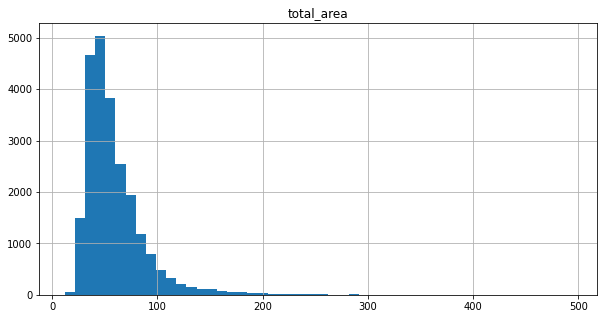

In [46]:
data.hist('total_area', figsize=(10, 5), bins=50);

In [47]:
data['total_area'].describe()

count    23310.000000
mean        59.041679
std         30.342155
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        494.100000
Name: total_area, dtype: float64

Гистограмма имеет вид распределения Пуассона.Среднее значение выше медианы, а значит имеются выбросы в верхних значениях. То есть есть квартиры большей площадью, чем среднее. Они завышают средние показатели площади. В большинстве случаев общая площадь квартир составляет от 40,0 м² до 68,3 м².

**Жилая площадь**

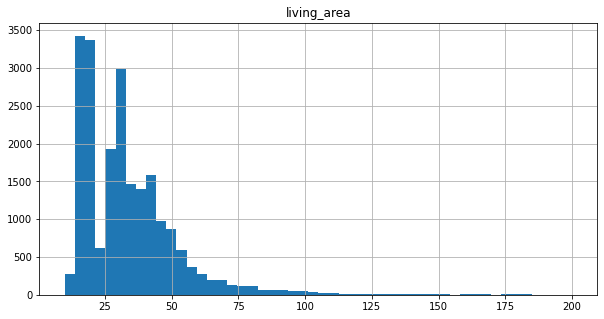

In [48]:
data.hist('living_area', figsize=(10, 5), bins=50);

In [49]:
display(data['living_area'].describe())

count    21434.000000
mean        33.744967
std         19.129655
min         10.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

Гистограмма имеет вид распределения Пуассона. Среднее значение жилой площади немного выше медианы, что говорит о наличии выбросов в верхних значениях (аналогично пункту выше). В большинстве случаев жилая площадь квартир составляет от 23,2 м² до 41,0 м².

**Площадь кухни**

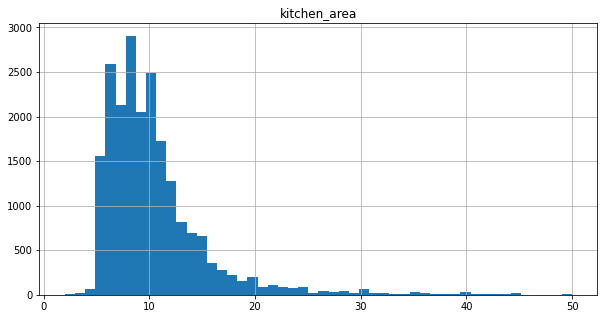

In [50]:
data.hist('kitchen_area', figsize=(10, 5), bins=50);

In [51]:
display(data['kitchen_area'].describe())

count    21066.000000
mean        10.361274
std          5.110424
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64

Гистограмма имеет вид распределения Пуассона. Среднее значение площади кухни выше медианы, что говорит о наличии выбросов в верхних значениях. В большинстве случаев площадь кухни составляет от 7,3 м² до 11,4 м².

**Цена объекта**

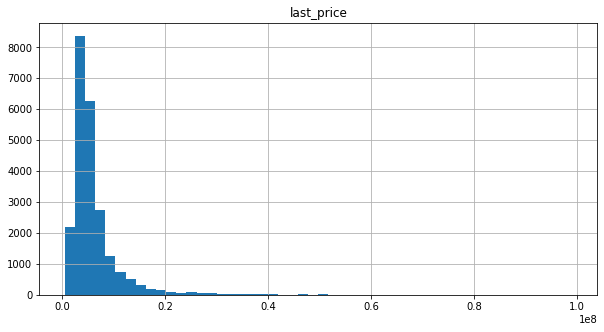

In [52]:
data.hist('last_price', figsize=(10, 5), bins=50);

In [53]:
display(data['last_price'].describe())

count    2.331000e+04
mean     6.100680e+06
std      5.922112e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64

Гистограмма имеет вид распределения Пуассона.Среднее значение цены квартиры выше медианы, что говорит о выбросах в верхних значениях. В большинстве случаев цена квартиры составляет от 3,49 млн руб. до 6,70 млн руб.

**Количество комнат**

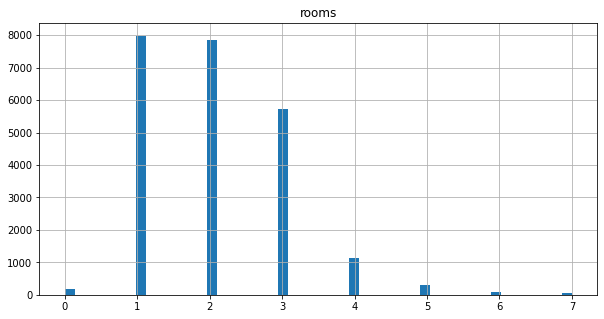

In [54]:
#Построим гистограмму
data.hist('rooms', figsize=(10, 5), bins=50);

In [55]:
display(data['rooms'].describe())

count    23310.000000
mean         2.048305
std          1.019977
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Среднее значение количества комнат совпадает с медианой. В большинстве случаев количество комнат в квартире составляет от 1 до 3.

**Высота потолков**

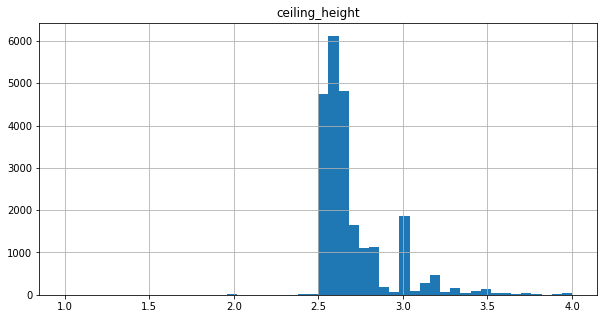

In [56]:
#Построим гистограмму
data.hist('ceiling_height', figsize=(10, 5), bins=50);

In [57]:
display(data['ceiling_height'].describe())

count    23310.000000
mean         2.695509
std          0.216009
min          1.000000
25%          2.600000
50%          2.640000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

Гистограмма частоты значений высоты потолков имеет вид распределения Пуассона.

Среднее значение высоты потолков почти совпадает с медианой. В большинстве случаев высота потолков составляет от 2,50 м до 2,80 м.

**Этаж квартиры**

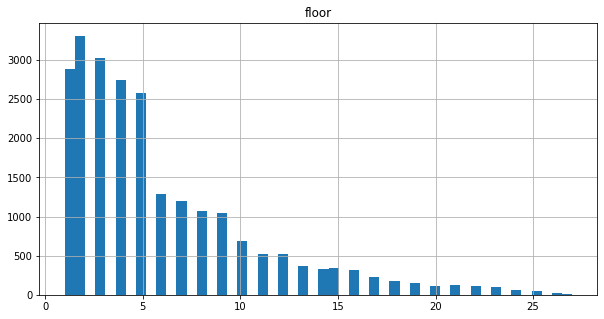

In [58]:
#Построим гистограмму
data.hist('floor', figsize=(10, 5), bins=50);

In [59]:
display(data['floor'].describe())

count    23310.000000
mean         5.883312
std          4.859900
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Среднее значение этажа квартиры выше медианы, что говорит о небольшом количестве выбросов в верхней части. В большинстве случаев квартиры расположены от 2 до 8 этажей.

**Тип этажа квартиры**

<AxesSubplot:>

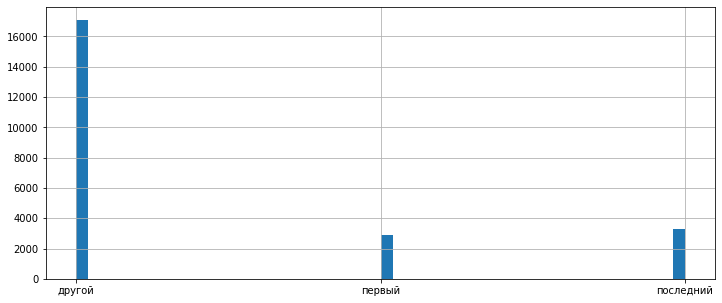

In [60]:
#Построим гистограмму
data['type_of_floor'].hist(figsize=(12, 5), bins=50)

In [61]:
display(data['type_of_floor'].describe())

count      23229
unique         3
top       другой
freq       17088
Name: type_of_floor, dtype: object

Квартиры, в основном, расположены не на первом и не на последнем этаже. Но на последнем этаже больше, чем на первом.

**Общее количество этажей в доме**

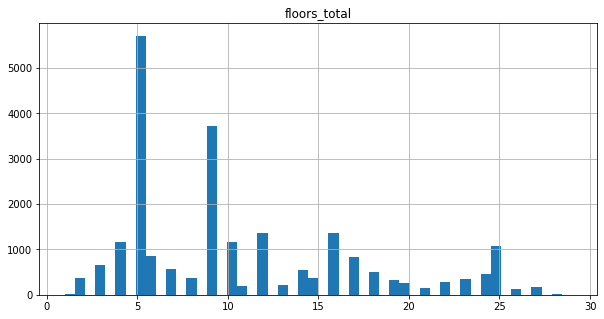

In [62]:
#Построим гистограмму
data.hist('floors_total', figsize=(10, 5), bins=50);

In [63]:
display(data['floors_total'].describe())

count    23226.000000
mean        10.665719
std          6.535364
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

Среднее значение общего количества этажей в доме выше медианы, что также говорит о небольшом количестве выбросов в верхней части. В большинстве случаев общее количество этажей в доме составляет от 5 до 16.

**Расстояние до центра города**

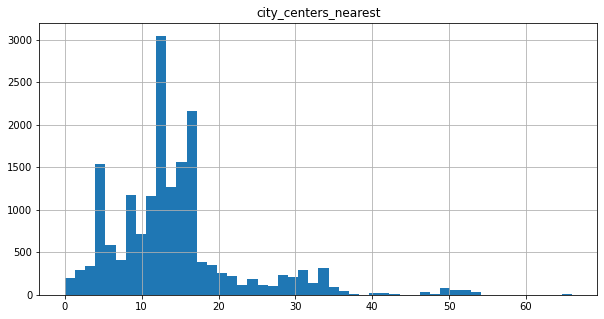

In [64]:
#Построим гистограмму
data.hist('city_centers_nearest', figsize=(10, 5), bins=50);

In [65]:
display(data['city_centers_nearest'].describe())

count    17820.000000
mean        14.253143
std          8.586167
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

Среднее значение расстояния до центра города немного выше медианы. Скорее всего, основной вклад в отличие среднего от медианы вносит Санкт-Петербург из-за относительно большей площади и подавляющего количества данных в датафрейме. В большинстве случаев расстояние до центра города составляет от 9241 м до 16293 м.

**Расстояние до ближайшего аэропорта**

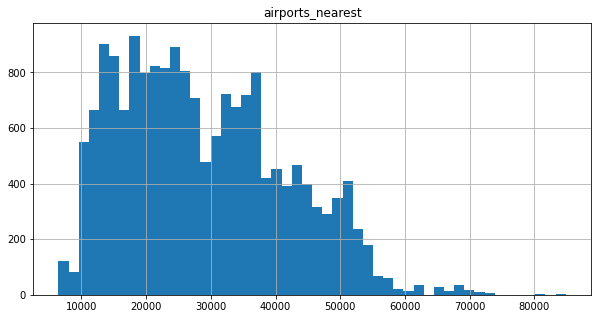

In [66]:
#Построим гистограмму
data.hist('airports_nearest', figsize=(10, 5), bins=50);

In [67]:
display(data['airports_nearest'].describe())

count    17800.000000
mean     28834.169831
std      12672.608087
min       6450.000000
25%      18500.000000
50%      26828.000000
75%      37364.000000
max      84853.000000
Name: airports_nearest, dtype: float64

Гистограмма имеет вид распределения Пуассона.Среднее значение расстояния до ближайшего парка немного выше медианы. В большинстве случаев расстояние до ближайшего парка составляет от 288 м до 612 м.

**Расстояние до ближайшего парка**

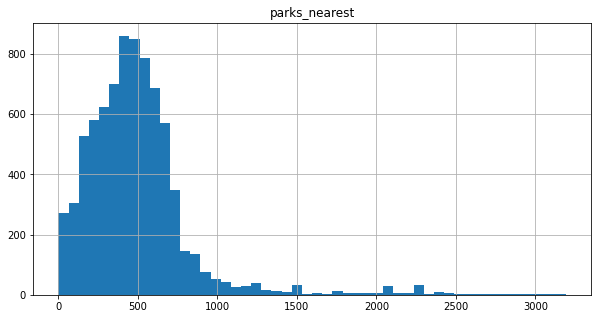

In [68]:
#Построим гистограмму
data.hist('parks_nearest', figsize=(10, 5), bins=50);

In [69]:
display(data['parks_nearest'].describe())

count    7875.000000
mean      490.405968
std       339.738972
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Гистограмма имеет вид распределения Пуассона.Среднее значение общей площади немного выше медианы, что говорит о наличии выбросов в верхних значениях. Скорее всего эти выбросы происходят за счёт данных о Санкт-Петербурге (там находится больше парков) из-за относительно большей площади и подавляющего количества данных в датафрейме.В большинстве случаев общая площадь квартир составляет от 40,0 м² до 68,3 м².

**День публикации объявления**

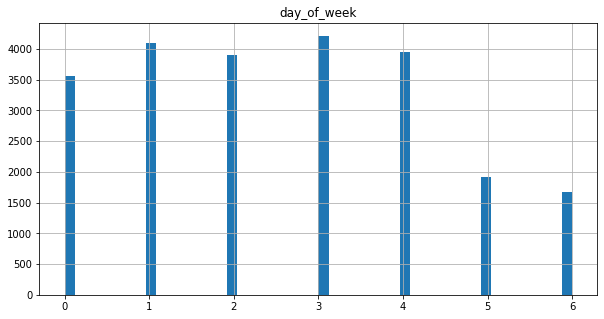

In [70]:
#Построим гистограмму
data.hist('day_of_week', figsize=(10, 5), bins=50);

In [71]:
display(data['day_of_week'].describe())

count    23310.000000
mean         2.572115
std          1.790382
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

В большинстве случаев объявления публиковались по будням. Чаще всего это вторник и четверг.

**Месяц публикации объявления**

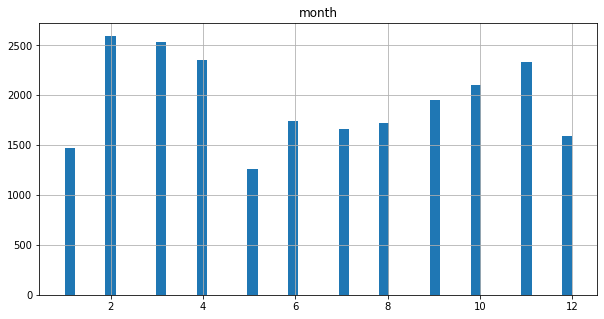

In [72]:
#Построим гистограмму
data.hist('month', figsize=(10, 5), bins=50);

In [73]:
display(data['month'].describe())

count    23310.000000
mean         6.400257
std          3.487231
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

Из месяцев лидируют февраль, март, апрель и ноябрь. Нижние показатели в январе, мае, декабре, на что воз0можно влияют праздники. Летом также публикуется не так много объявлений, тк люди зачатую в отпусках или отдыхают.

**Как быстро продавются квартиры (столбец days_exposition)**

Среднее время продажи квартиры в днях: 171
Медианное время продажи квартиры в днях: 93

Выбросы: Количество объявлений, которые сняты через:
45 дней: 877
60 дней: 535
90 дней: 202


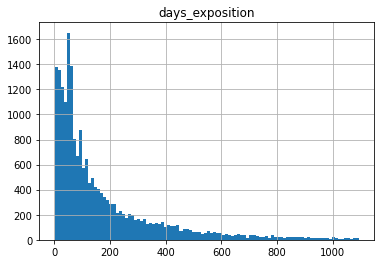

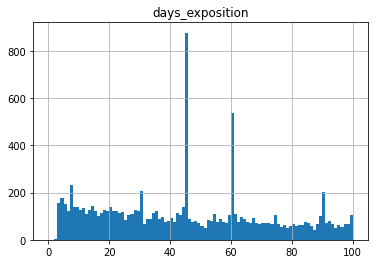

In [74]:
data.hist('days_exposition', bins=100);
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

print('\nВыбросы: Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

Так,среднее время продажи квартиры составляет 171 день. Но если взять медиану - то это уже 93 дня. Это происходит из-за некоторых объявлений, когда квартиры продавались слишком долго. Скорее всего это объяления, у которых истек срок размещения или оно уже неактивно. Возможно на сайте объявлений есть сроки размещения объявлений, после которых объявление удаляется и это 45 и 60 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [75]:
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  ]

for t in list_for_graph:
    correlation = data['last_price'].corr(data[t])
    print(f'Корреляция между last_price и {t} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 75.51%
Корреляция между last_price и living_area составляет: 66.54%
Корреляция между last_price и kitchen_area составляет: 56.02%
Корреляция между last_price и rooms составляет: 45.78%


<AxesSubplot:title={'center':'median'}, xlabel='year'>

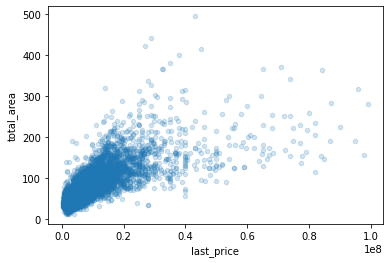

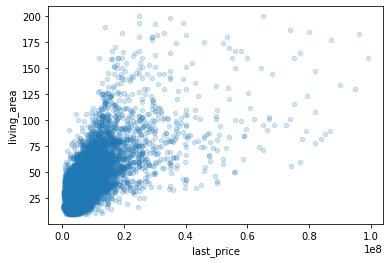

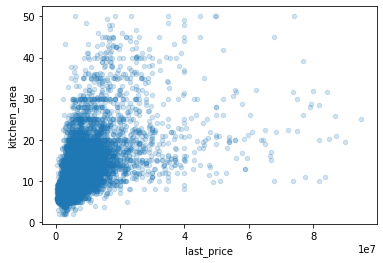

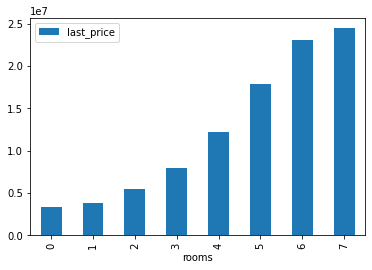

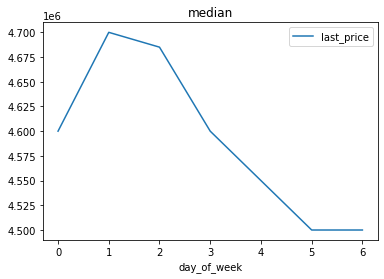

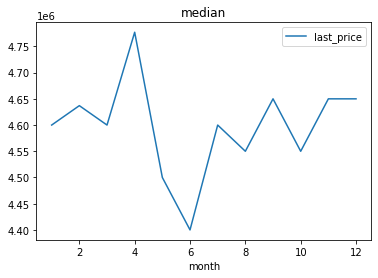

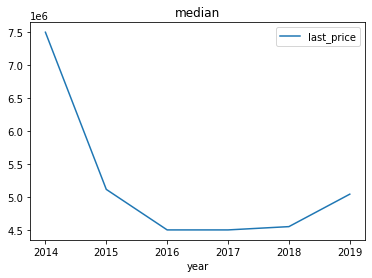

In [76]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')
data.pivot_table(index='day_of_week',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

Цена в большей мере зависит от:

* общей площади
* жилой площади
* площади кухни
* количества комнат


Цена в меньшей мере зависит от:

* даты размещения

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

<AxesSubplot:ylabel='locality_name'>

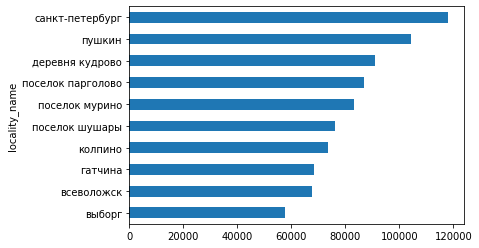

In [77]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['cost_m2'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['cost_m2'],ascending=True, inplace=True)
top_10['cost_m2'].plot(kind='barh')

In [78]:
#Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений
top_10['cost_m2'].median()

79736.69141111214

Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений составляет 79 736,7. Наибольшее число объявлений оказалось в Санкт-Петербурге.

**Средняя цена каждого километра**

<AxesSubplot:xlabel='city_centers_nearest'>

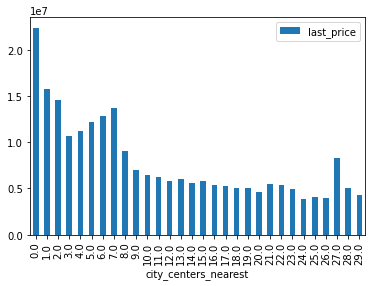

In [79]:
data[data['locality_name']=='санкт-петербург']\
    .pivot_table(\
        index='city_centers_nearest',\
        values='last_price',\
        aggfunc='mean')\
    .plot(kind='bar')

Лидирует недвижимость до 1км. Цены на недвижимость на расстоянии от 1 км до 7 км падают. Далее цена начинает ещё больше падать от 8 км до 27 км. На 27км стоимость резко повышается, возможно этро связано с какой-тодостопримечательностью или районом.

**Вывод по пункту:**

В данном пункте мя провели исследовательский анализ данных. Изучили и описали следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
  
  Также выянили некоторые данные, такие как:
  - Как быстро продавются квартиры (столбец days_exposition)
  - Какие факторы больше всего влияют на общую (полную) стоимость объекта
  - Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
  - Средняя цена каждого километра

### Общий вывод

Таким образом, мы провели исследование объявлений о продаже квартир. Нам был дан датафрейм с данными об объявлениях о квартирах, в которых мы могли изучить данные о площади квартиры, этаже, количестве этажей в доме, расстоянии от аэропорта, парки и водоемы рядом, площадь курни, цена и другое. Данные представлены в вещественных, целочисленных, строковых и булевых значениях. Были выведены гистограммы для визуального ознакомления с данными.

После изучения данных мы избавились от пропусков, насколько это было возможно.Часть пропущенных данных была заполнена медианой, часть заполнена нулями. Некоторые данные были оставлены без изменения. 

Далее изменили типы данных. В основном, изменение типа данных необходимо для экономии памяти. Только в случае с first_day_exposition это необходимо для дальнейшего удобство в работе с данными.

Столбцы, которых изменили тип данных:

* last_price - int64
* first_day_exposition - date
* floors_total - int8
* is_apartment - bool
* balcony - int8
* days_exposition - int64

Были удалены дубликаты, в частности, в столбце название населенного пункта.
Убрали редкие и выбивающиеся значения с помощью выведения распределение значений в данных. Аномалии были выявлены и удалены в следующих столбцах:

* last_price
* total_area
* rooms
* ceiling_height
* floors_total
* living_area
* kitchen_area
* days_exposition
* airports_nearest

Также добавили и посчитали новые столбцы, такие как:

* цена одного квадратного метра, 
* день публикации объявления
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры
* расстояние в км до центра города

Был проведен исследовательский анализ данных. С помощью гистограмм были определены следующие пиковые параметры:

* общая площадь от 40,0 м² до 68,3 м².
* жилая площадь от 23,2 м² до 41,0 м².
* площадь кухни от 7,3 м² до 11,4 м².
* цена объекта от 3,49 млн руб. до 6,70 млн руб.
* количество комнат от 1 до 3.
* высота потолков от 2,50 м до 2,80 м.
* этаж квартиры от 2 до 8 этажей.
* тип этажа квартиры на первом и не на последнем этаже
* общее количество этажей в доме от 5 до 16.
* расстояние до центра города от 9241 м до 16293 м.
* расстояние до ближайшего аэропорта от 288 м до 612 м.
* расстояние до ближайшего парка от 40,0 м² до 68,3 м².
* день публикации объявления вторник и четверг (также в основном будни)
* месяц публикации объявления февраль, март, апрель и ноябрь

Выявили среднее время продажи квартиры, которое составляет 171 день. Но если взять медиану - то это уже 93 дня. Это происходит из-за некоторых объявлений, когда квартиры продавались слишком долго. Скорее всего это объявления, у которых истек срок размещения или оно уже неактивно.

Благодаря, проведенному исследованию можно точно сказать, что больше всего влияют на общую (полную) стоимость объекта следующие факторы:

* общая площадь
* жилая площадь
* площадь кухни
* количество комнат

В меньшей мере цена зависит от даты размещения.

Возможно, стоит ввести ограничения на форме ввода данных для устранения пропусков и ошибок.  Так, некоторые ячейки нельзя будет оставлять незаполненными, а в других будет возможность выбора данных. Это упростит процесс заполнения для пользователя и поможет не допускать в данных ошибки. 
